In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import os
import datetime as dt

# Reading the sales data

In [2]:
path='../Sales_analysis/'
files = [file for file in os.listdir(path) if file.startswith('S')]

In [3]:
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
df=pd.DataFrame()
for file in files :
    df=pd.concat([df,pd.read_csv(file)],axis=0)
    

In [5]:
df.shape

(186850, 6)

In [6]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Data Cleaning and preprocessing

In [7]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [10]:
df.duplicated().sum()

618

In [11]:
df=df.drop_duplicates()

In [12]:
df.duplicated().sum()

0

### Droping the last unuseful header 

In [13]:
df[df['Order ID'].astype('str').str.contains("Order ID")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
df=df.drop(df[df['Order ID'].astype('str').str.contains("Order ID")].index,axis=0)

In [15]:
df[df['Order ID'].astype('str').str.contains("Order ID")]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185675 non-null  object
 1   Product           185675 non-null  object
 2   Quantity Ordered  185675 non-null  object
 3   Price Each        185675 non-null  object
 4   Order Date        185675 non-null  object
 5   Purchase Address  185675 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


### Correcting the dtypes of the columns

In [17]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [18]:
df['Order ID']=df['Order ID'].astype('int')

In [19]:
df['Quantity Ordered']=df['Quantity Ordered'].astype('int8')

In [20]:
df['Price Each']=df['Price Each'].astype('float')

In [21]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [22]:
df.dtypes

Order ID                     int32
Product                     object
Quantity Ordered              int8
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object

In [23]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185675 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185675 non-null  int32         
 1   Product           185675 non-null  object        
 2   Quantity Ordered  185675 non-null  int8          
 3   Price Each        185675 non-null  float64       
 4   Order Date        185675 non-null  datetime64[ns]
 5   Purchase Address  185675 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(1), int8(1), object(2)
memory usage: 8.0+ MB


In [25]:
df.describe()

,Order ID,Quantity Ordered,Price Each
count,185675.000000,185675.000000,185675.000000
mean,230412.075007,1.124551,184.524642
std,51511.754650,0.443081,332.850462
min,141234.000000,1.000000,2.990000
25%,185833.500000,1.000000,11.950000
50%,230355.000000,1.000000,14.950000
75%,275029.000000,1.000000,150.000000
max,319670.000000,9.000000,1700.000000


In [26]:
df['Order Month']=df['Order Date'].dt.month

In [27]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Adding sales amount column 

In [28]:
df['Sales Amount']=df['Quantity Ordered']*df['Price Each']

### Adding city column

In [29]:
df['City']=df['Purchase Address'].apply(lambda x : x.split(",")[1].strip())

In [30]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


### Saving our preprocessed data 

In [31]:
df.to_csv('Sales_cleaned.csv')

# Exploratory Data Analysis

### What was the best month for sales ?

In [32]:
df.groupby('Order Month')['Sales Amount'].sum().sort_values(ascending=False)

Order Month
12    4608280.75
10    3734177.86
4     3389217.98
11    3197863.10
5     3150506.24
3     2804969.51
7     2646311.32
6     2576268.16
8     2241071.38
2     2200075.09
9     2094453.74
1     1821313.17
Name: Sales Amount, dtype: float64

<AxesSubplot:xlabel='Order Month', ylabel='Sales Amount'>

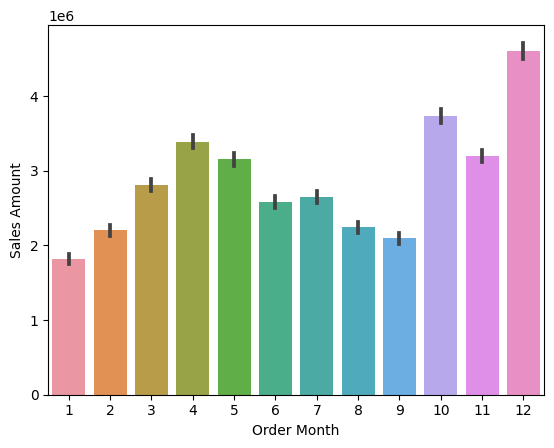

In [33]:
sns.barplot(data=df,x='Order Month',y='Sales Amount',estimator=sum)

Decemeber was the best month for sales with a sales amount of 4608280.75

###  What city sold the most products?

In [34]:
df.groupby('City')['Quantity Ordered'].sum().sort_values(ascending=False)

City
San Francisco    50166
Los Angeles      33245
New York City    27901
Boston           22492
Dallas           16707
Atlanta          16583
Seattle          16534
Portland         14037
Austin           11136
Name: Quantity Ordered, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Dallas'),
  Text(1, 0, 'Boston'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Atlanta'),
  Text(6, 0, 'New York City'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Austin')])

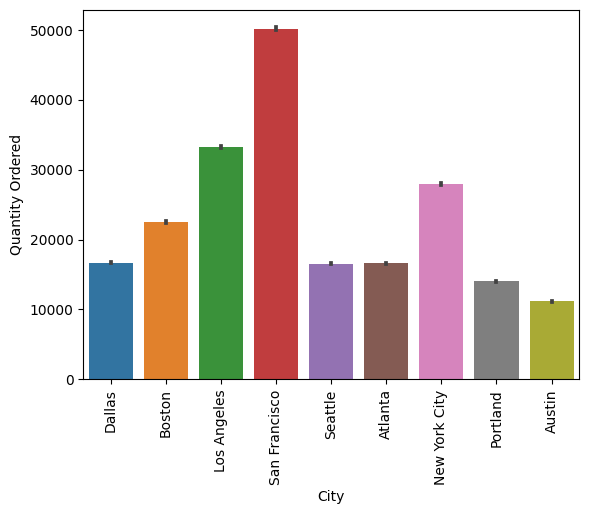

In [35]:
sns.barplot(data=df,x='City',y='Quantity Ordered',estimator=sum)
plt.xticks(rotation=90)

San Francisco was the best city in terms of the number of products (Quantity) with 50166

### Lets check the same question for the sales amount 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Dallas'),
  Text(1, 0, 'Boston'),
  Text(2, 0, 'Los Angeles'),
  Text(3, 0, 'San Francisco'),
  Text(4, 0, 'Seattle'),
  Text(5, 0, 'Atlanta'),
  Text(6, 0, 'New York City'),
  Text(7, 0, 'Portland'),
  Text(8, 0, 'Austin')])

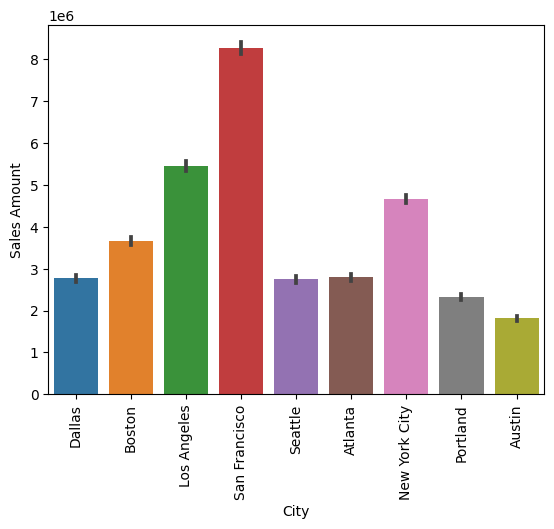

In [36]:
sns.barplot(data=df,x='City',y='Sales Amount',estimator=sum)
plt.xticks(rotation=90)

Still San Francisco is the best selling city

### Business question : What time should we display ads to maximize likelihood of customer's buying products ?

In [37]:
df['Order Date'].dt.hour

0         8
2        22
3        14
4        14
5         9
         ..
11681    20
11682    16
11683     7
11684    17
11685     0
Name: Order Date, Length: 185675, dtype: int64

In [38]:
df.groupby(df['Order Date'].dt.hour)['Order ID'].count().sort_values(ascending=False)

Order Date
19    12886
12    12573
11    12391
18    12262
20    12216
13    12115
14    10963
10    10929
21    10905
17    10884
16    10359
15    10157
22     8808
9      8738
23     6261
8      6252
7      4002
0      3902
6      2481
1      2347
5      1320
2      1242
4       852
3       830
Name: Order ID, dtype: int64

Text(0, 0.5, 'Number of orders')

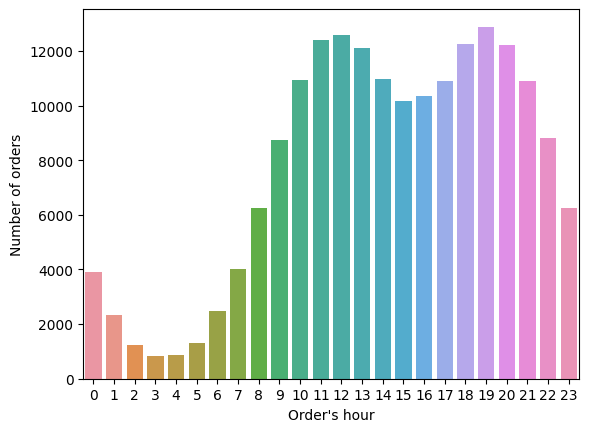

In [39]:
sns.countplot(data=df,x=df['Order Date'].dt.hour)
plt.xlabel("Order's hour")
plt.ylabel("Number of orders")

The best time would be around 19 o'clock and 12 o'clock <br>But we can say its almost at its best between 11 o'clock until 13 o'clock and from 18 to 20 o'clock

### What products are most often sold together ?

In [40]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales Amount,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


We have to create a column for products sold together

In [41]:
"""def search_prods(row):
    prods=[]
    for index,r in df.iterrows():
        if row['Order ID']==r['Order ID']:
            prods.append(r['Product'])
    row['Products Sold With This']=prods
    return row
    """

In [45]:
"""def search_prods(row):
    prods=[]
    data=df[df['Order ID']==row['Order ID']]
    if len(data)!=0 :
        for index,r in data.iterrows():
            prods.append(r['Product'])
    row['Products Sold With This']=prods
    return row"""

In [48]:
df=df.apply(lambda row : search_prods(row),axis=1)

KeyboardInterrupt: 

high search comlexity we will try using transform

In [46]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Order Month', 'Sales Amount', 'City'],
      dtype='object')

In [51]:
df['Products Sold With This']=df.groupby('Order ID')['Product'].transform(lambda x: '/'.join(x))

In [52]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales Amount,City,Products Sold With This
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Google Phone/Wired Headphones
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,Google Phone/Wired Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Wired Headphones


In [61]:
df[['Order ID','Products Sold With This']].duplicated().sum()

7249

In [62]:
data=df.drop_duplicates(subset=['Order ID','Products Sold With This'])

In [63]:
data.shape

(178426, 10)

In [66]:
data[['Order ID','Products Sold With This']].duplicated().sum()

0

In [64]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales Amount,City,Products Sold With This
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,Google Phone/Wired Headphones
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,USB-C Charging Cable


In [68]:
data[data['Products Sold With This'].str.contains("/")]['Products Sold With This'].value_counts().sort_values(ascending=False)

iPhone/Lightning Charging Cable             886
Google Phone/USB-C Charging Cable           857
iPhone/Wired Headphones                     361
Vareebadd Phone/USB-C Charging Cable        312
Google Phone/Wired Headphones               303
                                           ... 
Flatscreen TV/20in Monitor                    1
LG Dryer/AAA Batteries (4-pack)               1
iPhone/LG Washing Machine                     1
ThinkPad Laptop/LG Dryer                      1
LG Washing Machine/AA Batteries (4-pack)      1
Name: Products Sold With This, Length: 350, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'iPhone/Lightning Charging Cable'),
  Text(1, 0, 'Google Phone/USB-C Charging Cable'),
  Text(2, 0, 'iPhone/Wired Headphones'),
  Text(3, 0, 'Vareebadd Phone/USB-C Charging Cable'),
  Text(4, 0, 'Google Phone/Wired Headphones'),
  Text(5, 0, 'iPhone/Apple Airpods Headphones'),
  Text(6, 0, 'Google Phone/Bose SoundSport Headphones'),
  Text(7, 0, 'Vareebadd Phone/Wired Headphones'),
  Text(8, 0, 'Google Phone/USB-C Charging Cable/Wired Headphones'),
  Text(9, 0, 'Vareebadd Phone/Bose SoundSport Headphones')])

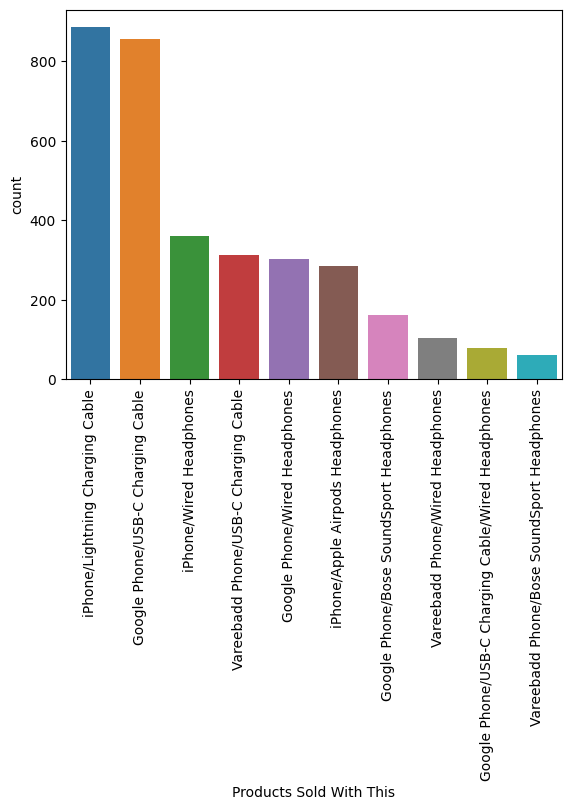

In [75]:
sns.countplot(data=data,x=data[data['Products Sold With This'].str.contains("/")]['Products Sold With This']\
              ,order=data[data['Products Sold With This'].str.contains("/")]['Products Sold With This'].value_counts().iloc[:10].index)
plt.xticks(rotation=90)

### What product was sold the most ?

In [77]:
df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

Product
AAA Batteries (4-pack)        30985
AA Batteries (4-pack)         27614
USB-C Charging Cable          23929
Lightning Charging Cable      23168
Wired Headphones              20522
Apple Airpods Headphones      15636
Bose SoundSport Headphones    13429
27in FHD Monitor               7541
iPhone                         6847
27in 4K Gaming Monitor         6239
34in Ultrawide Monitor         6192
Google Phone                   5528
Flatscreen TV                  4813
Macbook Pro Laptop             4725
ThinkPad Laptop                4128
20in Monitor                   4125
Vareebadd Phone                2068
LG Washing Machine              666
LG Dryer                        646
Name: Quantity Ordered, dtype: int64

<AxesSubplot:xlabel='Quantity Ordered', ylabel='Product'>

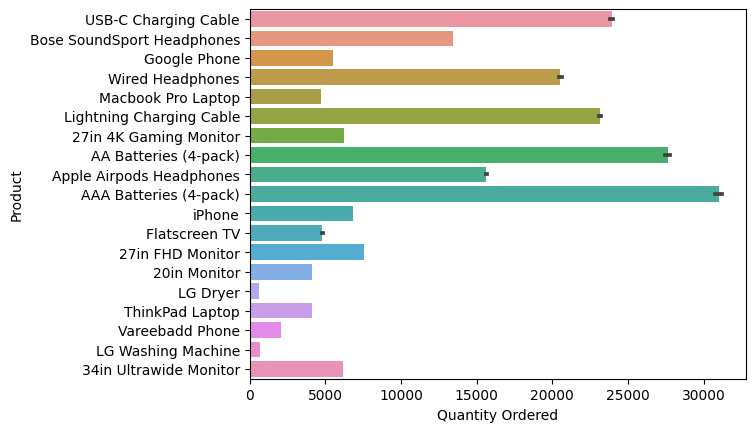

In [79]:
sns.barplot(data=df,x='Quantity Ordered',y='Product',estimator=sum)

In [82]:
df[df["Product"]=='AAA Batteries (4-pack)']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales Amount,City,Products Sold With This
20,176575,AAA Batteries (4-pack),1,2.99,2019-04-27 00:30:00,"433 Hill St, New York City, NY 10001",4,2.99,New York City,AAA Batteries (4-pack)
28,176583,AAA Batteries (4-pack),2,2.99,2019-04-20 12:00:00,"146 Jackson St, Portland, OR 97035",4,5.98,Portland,AAA Batteries (4-pack)
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,AAA Batteries (4-pack)/Google Phone
45,176598,AAA Batteries (4-pack),2,2.99,2019-04-21 20:33:00,"294 Park St, San Francisco, CA 94016",4,5.98,San Francisco,AAA Batteries (4-pack)
54,176607,AAA Batteries (4-pack),2,2.99,2019-04-18 12:11:00,"689 10th St, Boston, MA 02215",4,5.98,Boston,AAA Batteries (4-pack)
...,...,...,...,...,...,...,...,...,...,...
11663,259336,AAA Batteries (4-pack),3,2.99,2019-09-25 00:13:00,"753 14th St, Boston, MA 02215",9,8.97,Boston,AAA Batteries (4-pack)
11665,259338,AAA Batteries (4-pack),2,2.99,2019-09-02 21:29:00,"666 Lakeview St, Boston, MA 02215",9,5.98,Boston,AAA Batteries (4-pack)
11671,259344,AAA Batteries (4-pack),2,2.99,2019-09-10 23:33:00,"721 Madison St, San Francisco, CA 94016",9,5.98,San Francisco,AAA Batteries (4-pack)
11676,259349,AAA Batteries (4-pack),1,2.99,2019-09-01 22:14:00,"911 River St, Dallas, TX 75001",9,2.99,Dallas,AAA Batteries (4-pack)


In [84]:
df.describe()

,Order ID,Quantity Ordered,Price Each,Order Month,Sales Amount
count,185675.000000,185675.000000,185675.000000,185675.000000,185675.000000
mean,230412.075007,1.124551,184.524642,7.058672,185.617387
std,51511.754650,0.443081,332.850462,3.502930,333.038731
min,141234.000000,1.000000,2.990000,1.000000,2.990000
25%,185833.500000,1.000000,11.950000,4.000000,11.950000
50%,230355.000000,1.000000,14.950000,7.000000,14.950000
75%,275029.000000,1.000000,150.000000,10.000000,150.000000
max,319670.000000,9.000000,1700.000000,12.000000,3400.000000


As we can see here this product has the cheapest price in our dataset <br> It could be the reason why it is the best seller

<AxesSubplot:xlabel='Price Each', ylabel='Quantity Ordered'>

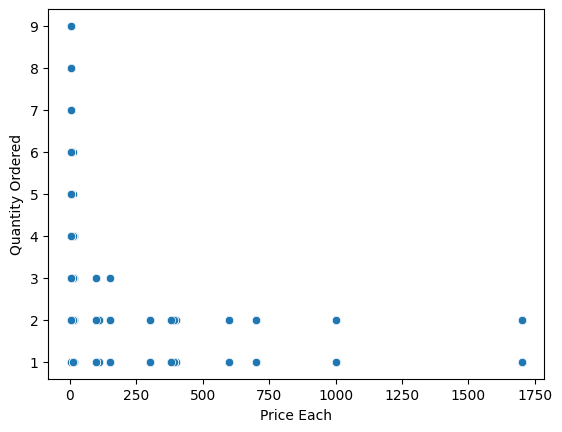

In [90]:
sns.scatterplot(data=df,x='Price Each',y='Quantity Ordered')

When the unit price goes up the quantity ordered goes down

In [94]:
df['Price Each'].nunique()

17

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '2.99'),
  Text(1, 0, '3.84'),
  Text(2, 0, '11.95'),
  Text(3, 0, '11.99'),
  Text(4, 0, '14.95'),
  Text(5, 0, '99.99'),
  Text(6, 0, '109.99'),
  Text(7, 0, '149.99'),
  Text(8, 0, '150.0'),
  Text(9, 0, '300.0'),
  Text(10, 0, '379.99'),
  Text(11, 0, '389.99'),
  Text(12, 0, '400.0'),
  Text(13, 0, '600.0'),
  Text(14, 0, '700.0'),
  Text(15, 0, '999.99'),
  Text(16, 0, '1700.0')])

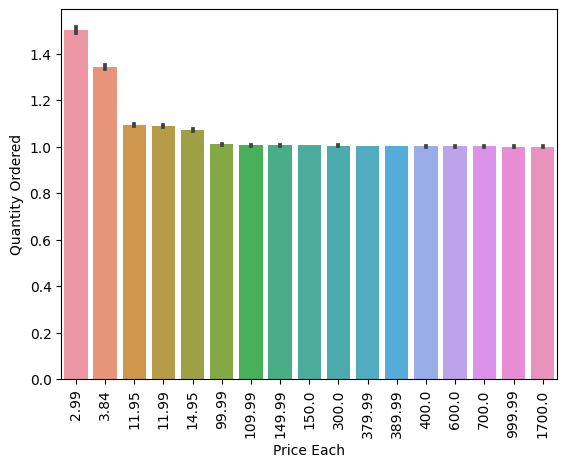

In [93]:
sns.barplot(data=df,x='Price Each',y='Quantity Ordered')
plt.xticks(rotation=90)

We can almost confirm our hypothesis that the more the price goes up the quantity ordered goes down <br> so the AAA Batteries (4-pack) is the best seller because it is the cheapest